In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('./lego_sets.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18457 entries, 0 to 18456
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   set_id          18457 non-null  object 
 1   name            18457 non-null  object 
 2   year            18457 non-null  int64  
 3   theme           18457 non-null  object 
 4   subtheme        14901 non-null  object 
 5   themeGroup      18455 non-null  object 
 6   category        18457 non-null  object 
 7   pieces          14533 non-null  float64
 8   minifigs        8399 non-null   float64
 9   agerange_min    6787 non-null   float64
 10  US_retailPrice  6982 non-null   float64
 11  bricksetURL     18457 non-null  object 
 12  thumbnailURL    17451 non-null  object 
 13  imageURL        17451 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 2.0+ MB


In [ ]:
df.head()

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL
0,1-8,Small house set,1970,Minitalia,NaN,Vintage,Normal,67.0,NaN,NaN,NaN,https://brickset.com/sets/1-8,https://images.brickset.com/sets/small/1-8.jpg,https://images.brickset.com/sets/images/1-8.jpg
1,2-8,Medium house set,1970,Minitalia,NaN,Vintage,Normal,109.0,NaN,NaN,NaN,https://brickset.com/sets/2-8,https://images.brickset.com/sets/small/2-8.jpg,https://images.brickset.com/sets/images/2-8.jpg
2,3-6,Medium house set,1970,Minitalia,NaN,Vintage,Normal,158.0,NaN,NaN,NaN,https://brickset.com/sets/3-6,https://images.brickset.com/sets/small/3-6.jpg,https://images.brickset.com/sets/images/3-6.jpg
3,4-4,Large house set,1970,Minitalia,NaN,Vintage,Normal,233.0,NaN,NaN,NaN,https://brickset.com/sets/4-4,https://images.brickset.com/sets/small/4-4.jpg,https://images.brickset.com/sets/images/4-4.jpg
4,4-6,Mini House and Vehicles,1970,Samsonite,Model Maker,Vintage,Normal,NaN,NaN,NaN,NaN,https://brickset.com/sets/4-6,NaN,NaN


In [ ]:
df.isnull().mean() * 100

,0
set_id,0.000000
name,0.000000
year,0.000000
theme,0.000000
subtheme,19.266403
themeGroup,0.010836
category,0.000000
pieces,21.260226
minifigs,54.494230
agerange_min,63.228044


In [ ]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['themeGroup']

<Axes: xlabel='pieces', ylabel='Count'>

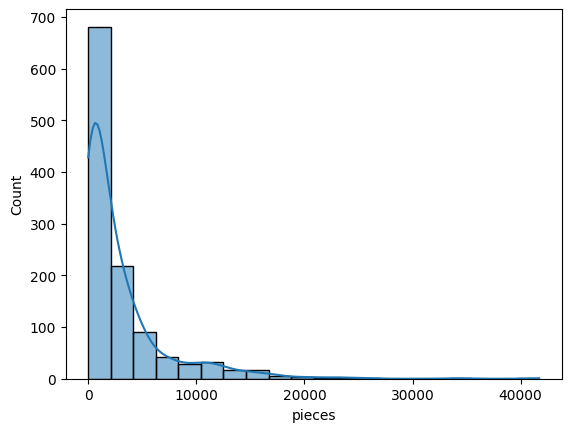

In [ ]:
sns.histplot(df.groupby(['theme','year'])['pieces'].sum(), kde=True, bins=20)

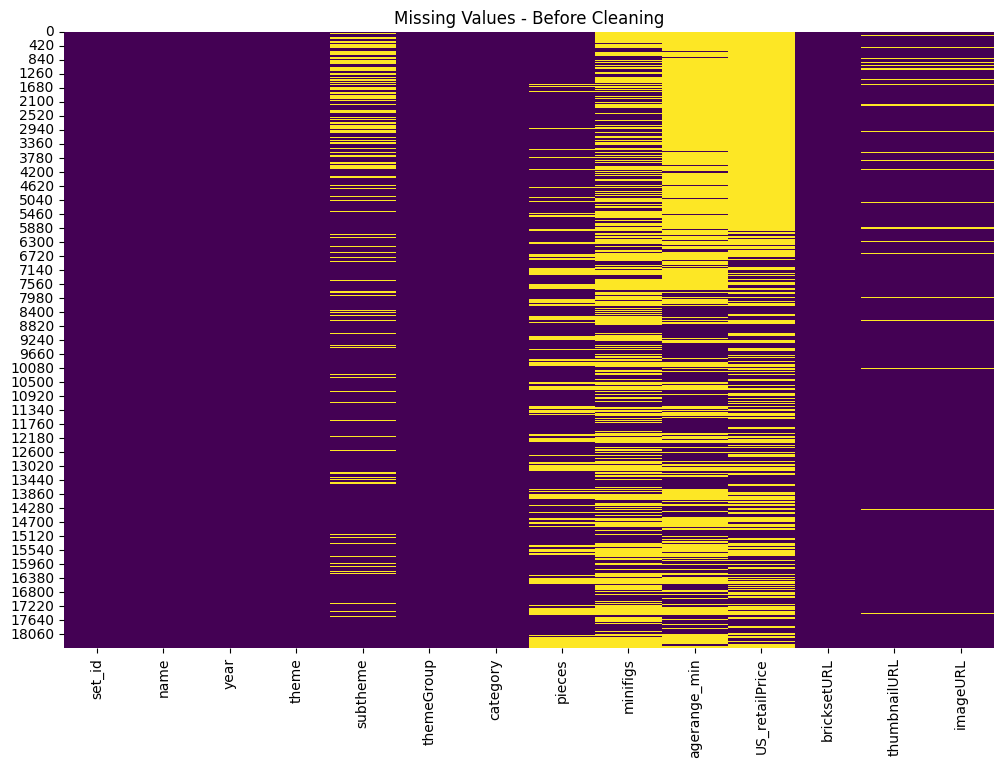

In [ ]:
# Visualizing missing values before cleaning
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values - Before Cleaning")
plt.show()

In [ ]:
df.groupby(['theme', 'year'])['pieces'].skew().dropna().mean()

np.float64(1.449296869385042)

In [ ]:
# Step 1: Fill missing pieces based on (theme, year) group
df['pieces'] = df.groupby(['theme', 'year'])['pieces'].transform(lambda x: x.fillna(x.median()) if not x.dropna().empty else x)

# Step 2: Fill remaining missing values based on theme (only if the group isn't empty)
df['pieces'] = df.groupby('theme')['pieces'].transform(lambda x: x.fillna(x.median()) if not x.dropna().empty else x)

# Step 3: Fill any remaining missing values with the overall median
df['pieces'].fillna(df['pieces'].median(), inplace=True)

# Step 4: Convert to integer (since pieces are always whole numbers)
df['pieces'] = df['pieces'].astype(int)

<ipython-input-10-8558f3fb98d1>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pieces'].fillna(df['pieces'].median(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18457 entries, 0 to 18456
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   set_id          18457 non-null  object 
 1   name            18457 non-null  object 
 2   year            18457 non-null  int64  
 3   theme           18457 non-null  object 
 4   subtheme        14901 non-null  object 
 5   themeGroup      18455 non-null  object 
 6   category        18457 non-null  object 
 7   pieces          18457 non-null  int64  
 8   minifigs        8399 non-null   float64
 9   agerange_min    6787 non-null   float64
 10  US_retailPrice  6982 non-null   float64
 11  bricksetURL     18457 non-null  object 
 12  thumbnailURL    17451 non-null  object 
 13  imageURL        17451 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 2.0+ MB


In [ ]:
df['subtheme'] = df.groupby(['theme', 'year'])['subtheme'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))

<ipython-input-12-93f815046f45>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['subtheme'] = df.groupby(['theme', 'year'])['subtheme'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))


In [ ]:
df['subtheme'].fillna('N/A',inplace=True)

<ipython-input-13-fff57d72dd0c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['subtheme'].fillna('N/A',inplace=True)


<Axes: xlabel='minifigs', ylabel='Count'>

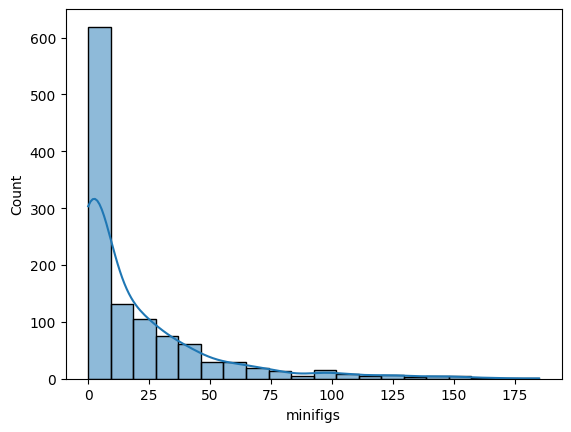

In [ ]:
sns.histplot(df.groupby(['theme', 'year'])['minifigs'].sum(), kde=True, bins=20)

In [ ]:
df.groupby(['theme', 'year'])['minifigs'].skew().dropna().mean()

np.float64(1.1256561240329952)

In [ ]:
# Step 1: Fill missing pieces based on (theme, year) group
df['minifigs'] = df.groupby(['theme', 'year'])['minifigs'].transform(lambda x: x.fillna(x.median()) if not x.dropna().empty else x)

# Step 2: Fill remaining missing values based on theme (only if the group isn't empty)
df['minifigs'] = df.groupby('theme')['minifigs'].transform(lambda x: x.fillna(x.median()) if not x.dropna().empty else x)

# Step 3: Fill any remaining missing values with the overall median
df['minifigs'].fillna(df['minifigs'].median(), inplace=True)

# Step 4: Convert to integer (since pieces are always whole numbers)
df['minifigs'] = df['minifigs'].astype(int)

<ipython-input-16-ec5eeb4c1907>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['minifigs'].fillna(df['minifigs'].median(), inplace=True)


In [ ]:
df['thumbnailURL'].fillna('Not Available',inplace=True)
df['imageURL'].fillna('Not Available',inplace=True)

<ipython-input-17-714b4761cad6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['thumbnailURL'].fillna('Not Available',inplace=True)
<ipython-input-17-714b4761cad6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
df.sample(10)

,set_id,name,year,theme,subtheme,themeGroup,category,pieces,minifigs,agerange_min,US_retailPrice,bricksetURL,thumbnailURL,imageURL
4300,1405-1,Racing Lion,2001,Duplo,Bob the Builder,Pre-school,Normal,2,1,NaN,NaN,https://brickset.com/sets/1405-1,https://images.brickset.com/sets/small/1405-1.jpg,https://images.brickset.com/sets/images/1405-1...
8440,8684-5,Vampire,2010,Collectable Minifigures,Series 2,Miscellaneous,Normal,7,1,5.0,1.99,https://brickset.com/sets/8684-5,https://images.brickset.com/sets/small/8684-5.jpg,https://images.brickset.com/sets/images/8684-5...
14300,42071-1,Dozer Compactor,2018,Technic,N/A,Technical,Normal,171,1,NaN,19.99,https://brickset.com/sets/42071-1,https://images.brickset.com/sets/small/42071-1...,https://images.brickset.com/sets/images/42071-...
14431,71022-3,Ron Weasley,2018,Collectable Minifigures,Harry Potter,Miscellaneous,Normal,8,1,5.0,NaN,https://brickset.com/sets/71022-3,https://images.brickset.com/sets/small/71022-3...,https://images.brickset.com/sets/images/71022-...
7992,30006-1,Clone Walker,2009,Star Wars,The Clone Wars,Licensed,Normal,31,1,6.0,NaN,https://brickset.com/sets/30006-1,https://images.brickset.com/sets/small/30006-1...,https://images.brickset.com/sets/images/30006-...
10949,41511-1,Flurr,2014,Mixels,Series 2,Miscellaneous,Normal,46,2,6.0,4.99,https://brickset.com/sets/41511-1,https://images.brickset.com/sets/small/41511-1...,https://images.brickset.com/sets/images/41511-...
17215,892180-1,Cole,2021,Ninjago,Magazine Gift,Action/Adventure,Other,2,1,NaN,NaN,https://brickset.com/sets/892180-1,https://images.brickset.com/sets/small/892180-...,https://images.brickset.com/sets/images/892180...
13398,41498-1,Boba Fett and Han Solo in Carbonite,2017,BrickHeadz,Star Wars,Licensed,Normal,329,2,10.0,NaN,https://brickset.com/sets/41498-1,https://images.brickset.com/sets/small/41498-1...,https://images.brickset.com/sets/images/41498-...
11818,70740-1,Airjitzu Jay Flyer,2015,Ninjago,Airjitzu,Action/Adventure,Normal,45,1,6.0,9.99,https://brickset.com/sets/70740-1,https://images.brickset.com/sets/small/70740-1...,https://images.brickset.com/sets/images/70740-...
12693,71012-14,Syndrome,2016,Collectable Minifigures,Disney,Miscellaneous,Normal,6,1,5.0,NaN,https://brickset.com/sets/71012-14,https://images.brickset.com/sets/small/71012-1...,https://images.brickset.com/sets/images/71012-...


In [ ]:
df["agerange_min"].skew()

np.float64(1.7308305686208032)

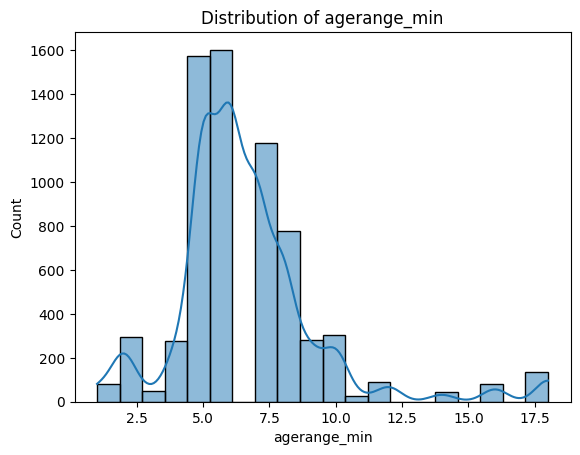

In [ ]:
sns.histplot(df['agerange_min'].dropna(), kde=True, bins=20)
plt.title("Distribution of agerange_min")
plt.show()


In [ ]:
df.groupby("theme")["agerange_min"].skew().dropna().mean()

np.float64(0.8661132109461984)

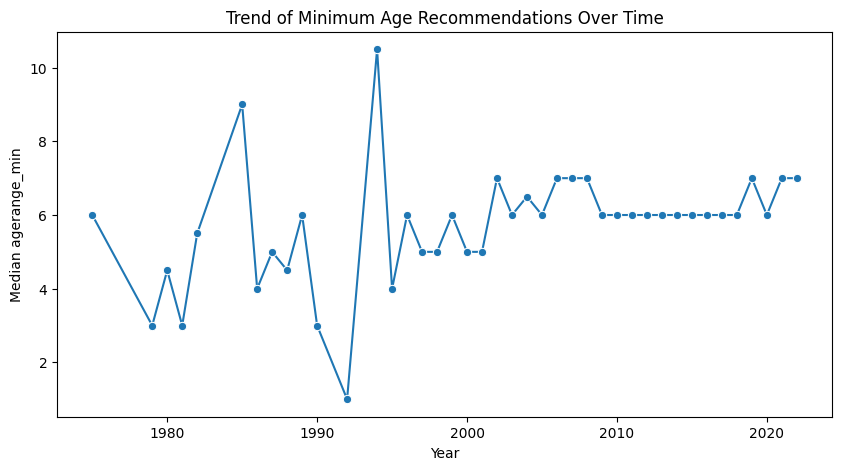

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
yearly_trend = df.groupby("year")["agerange_min"].median()

# Plot the trend
plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o")
plt.xlabel("Year")
plt.ylabel("Median agerange_min")
plt.title("Trend of Minimum Age Recommendations Over Time")
plt.show()

In [ ]:
# Step 1: Fill missing pieces based on (theme, year) group
df['agerange_min'] = df.groupby(['theme', 'year'])['agerange_min'].transform(lambda x: x.fillna(x.median()) if not x.dropna().empty else x)

# Step 2: Fill remaining missing values based on theme (only if the group isn't empty)
df['agerange_min'] = df.groupby('theme')['agerange_min'].transform(lambda x: x.fillna(x.median()) if not x.dropna().empty else x)

# Step 3: Fill any remaining missing values with the overall median
df['agerange_min'].fillna(df['agerange_min'].median(), inplace=True)

# Step 4: Convert to integer (since pieces are always whole numbers)
df['agerange_min'] = df['agerange_min'].astype(int)

<ipython-input-23-a2be75a16c29>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['agerange_min'].fillna(df['agerange_min'].median(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18457 entries, 0 to 18456
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   set_id          18457 non-null  object 
 1   name            18457 non-null  object 
 2   year            18457 non-null  int64  
 3   theme           18457 non-null  object 
 4   subtheme        18457 non-null  object 
 5   themeGroup      18455 non-null  object 
 6   category        18457 non-null  object 
 7   pieces          18457 non-null  int64  
 8   minifigs        18457 non-null  int64  
 9   agerange_min    18457 non-null  int64  
 10  US_retailPrice  6982 non-null   float64
 11  bricksetURL     18457 non-null  object 
 12  thumbnailURL    18457 non-null  object 
 13  imageURL        18457 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 2.0+ MB


In [ ]:
df['US_retailPrice'].skew()

np.float64(5.444356452399352)

<Axes: xlabel='US_retailPrice', ylabel='Count'>

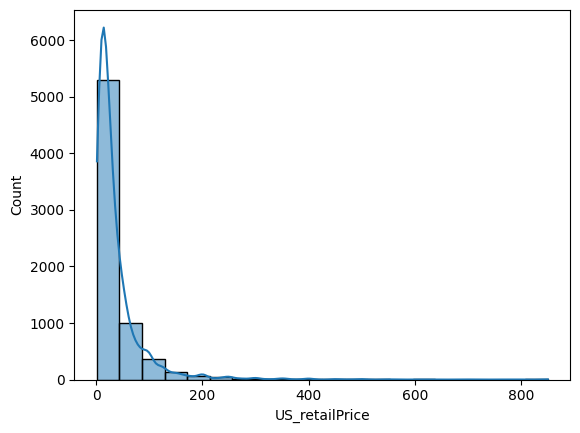

In [ ]:
sns.histplot(df['US_retailPrice'].dropna(), kde=True, bins=20)

In [ ]:
# Step 1: Fill missing pieces based on (theme, year) group
df['US_retailPrice'] = df.groupby(['theme', 'year'])['US_retailPrice'].transform(lambda x: x.fillna(x.median()) if not x.dropna().empty else x)

# Step 2: Fill remaining missing values based on theme (only if the group isn't empty)
df['US_retailPrice'] = df.groupby('theme')['US_retailPrice'].transform(lambda x: x.fillna(x.median()) if not x.dropna().empty else x)

# Step 3: Fill any remaining missing values with the overall median
df['US_retailPrice'].fillna(df['US_retailPrice'].median(), inplace=True)

# Step 4: Convert to integer (since pieces are always whole numbers)
df['US_retailPrice'] = df['US_retailPrice'].astype(int)

<ipython-input-27-3a2368cbfdd6>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['US_retailPrice'].fillna(df['US_retailPrice'].median(), inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18457 entries, 0 to 18456
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   set_id          18457 non-null  object
 1   name            18457 non-null  object
 2   year            18457 non-null  int64 
 3   theme           18457 non-null  object
 4   subtheme        18457 non-null  object
 5   themeGroup      18455 non-null  object
 6   category        18457 non-null  object
 7   pieces          18457 non-null  int64 
 8   minifigs        18457 non-null  int64 
 9   agerange_min    18457 non-null  int64 
 10  US_retailPrice  18457 non-null  int64 
 11  bricksetURL     18457 non-null  object
 12  thumbnailURL    18457 non-null  object
 13  imageURL        18457 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.0+ MB


In [ ]:
df.to_csv('./cleaned.csv')

In [ ]:
num_cols = ['US_retailPrice', 'agerange_min','minifigs', 'pieces']
skewness_values = df[num_cols].skew()
print(skewness_values)

US_retailPrice    6.421163
agerange_min      1.455939
minifigs          4.607871
pieces            8.326076
dtype: float64


In [ ]:
scaled = df

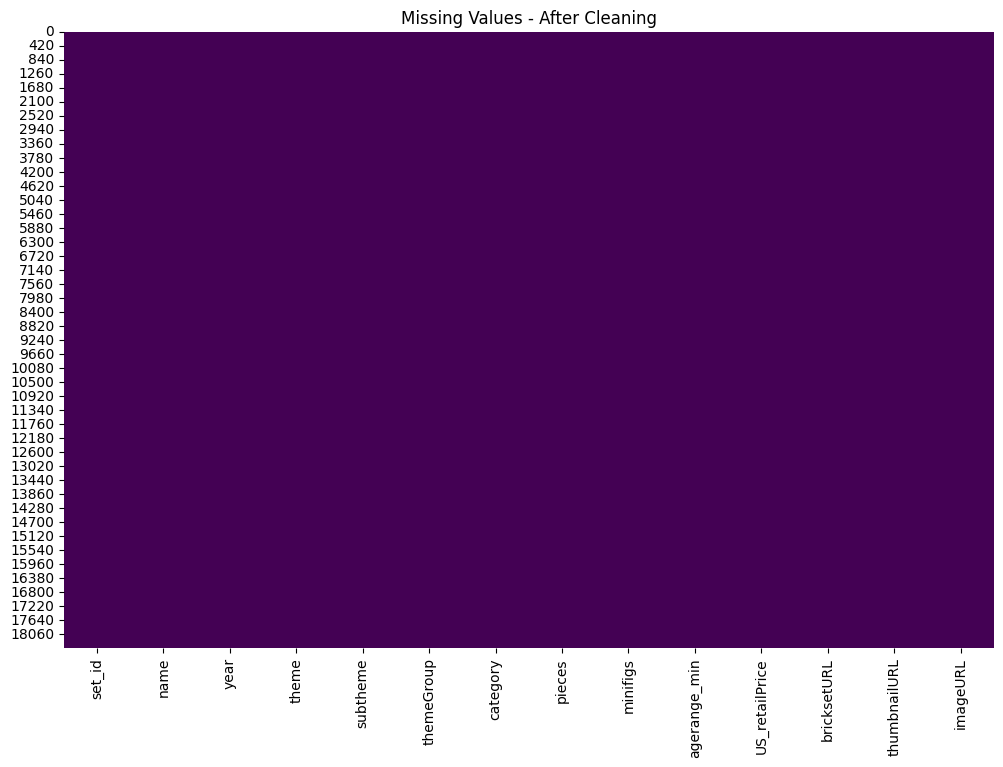

In [ ]:
# Visualizing missing values after cleaning
plt.figure(figsize=(12, 8))
sns.heatmap(scaled.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values - After Cleaning")
plt.show()

In [ ]:
scaled.drop(columns=['set_id', 'bricksetURL', 'thumbnailURL', 'imageURL', 'name'], inplace=True)

In [ ]:
# Save the state BEFORE filtering
original_scaled = scaled.copy()

# Now perform IQR-based filtering (you've probably already done this)
Q1 = original_scaled[num_cols].quantile(0.25)
Q3 = original_scaled[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create the filtered version
scaled = original_scaled[~((original_scaled[num_cols] < lower_bound) | (original_scaled[num_cols] > upper_bound)).any(axis=1)]


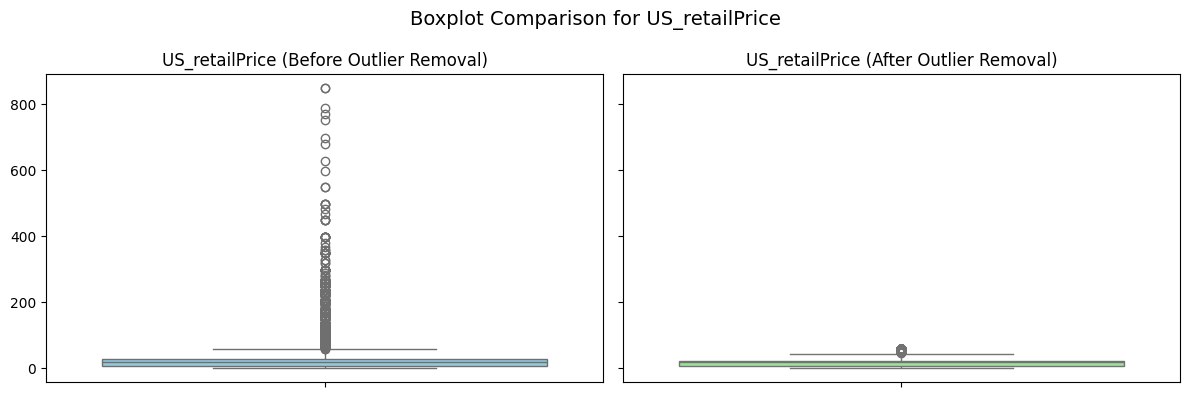

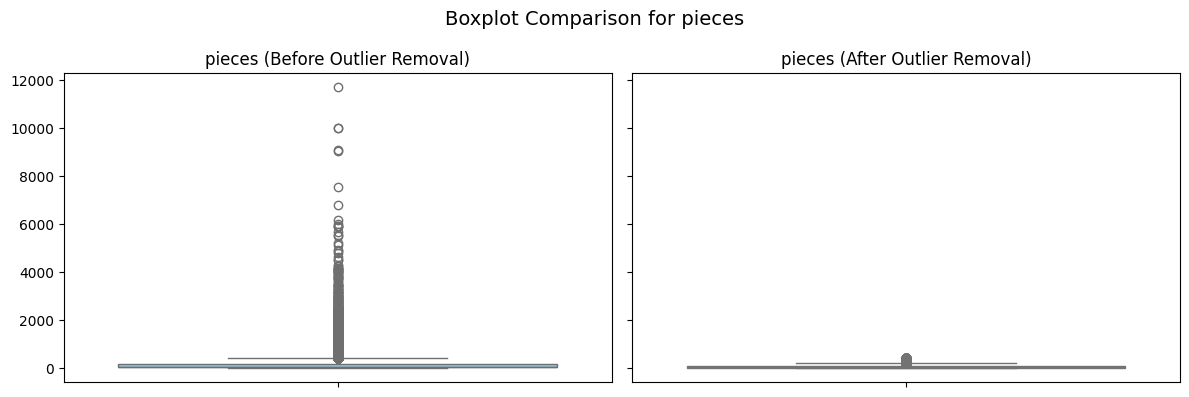

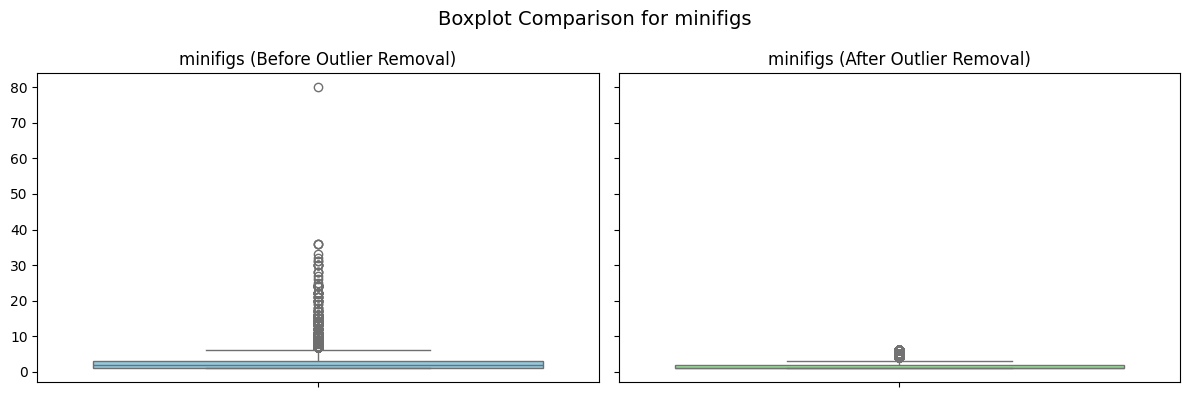

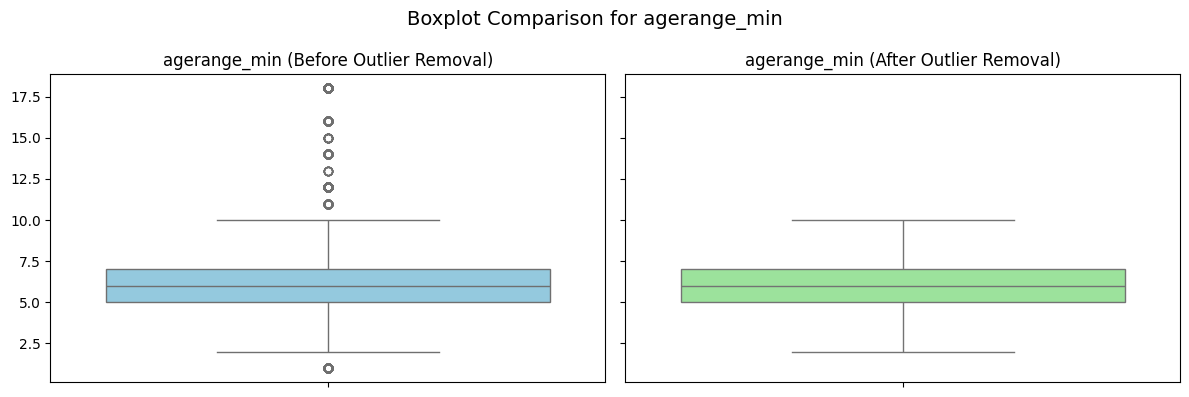

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace this with your actual list of numerical columns
num_cols = ['US_retailPrice', 'pieces', 'minifigs', 'agerange_min']

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    sns.boxplot(y=original_scaled[col], ax=axes[0], color='skyblue')
    axes[0].set_title(f'{col} (Before Outlier Removal)')

    sns.boxplot(y=scaled[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'{col} (After Outlier Removal)')

    for ax in axes:
        ax.set_ylabel('')
        ax.set_xlabel('')

    plt.suptitle(f'Boxplot Comparison for {col}', fontsize=14)
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
scaled[num_cols] = minmax_scaler.fit_transform(scaled[num_cols])

<ipython-input-36-b3d5f2efb911>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled[num_cols] = minmax_scaler.fit_transform(scaled[num_cols])


In [ ]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14879 entries, 0 to 18456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            14879 non-null  int64  
 1   theme           14879 non-null  object 
 2   subtheme        14879 non-null  object 
 3   themeGroup      14877 non-null  object 
 4   category        14879 non-null  object 
 5   pieces          14879 non-null  float64
 6   minifigs        14879 non-null  float64
 7   agerange_min    14879 non-null  float64
 8   US_retailPrice  14879 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


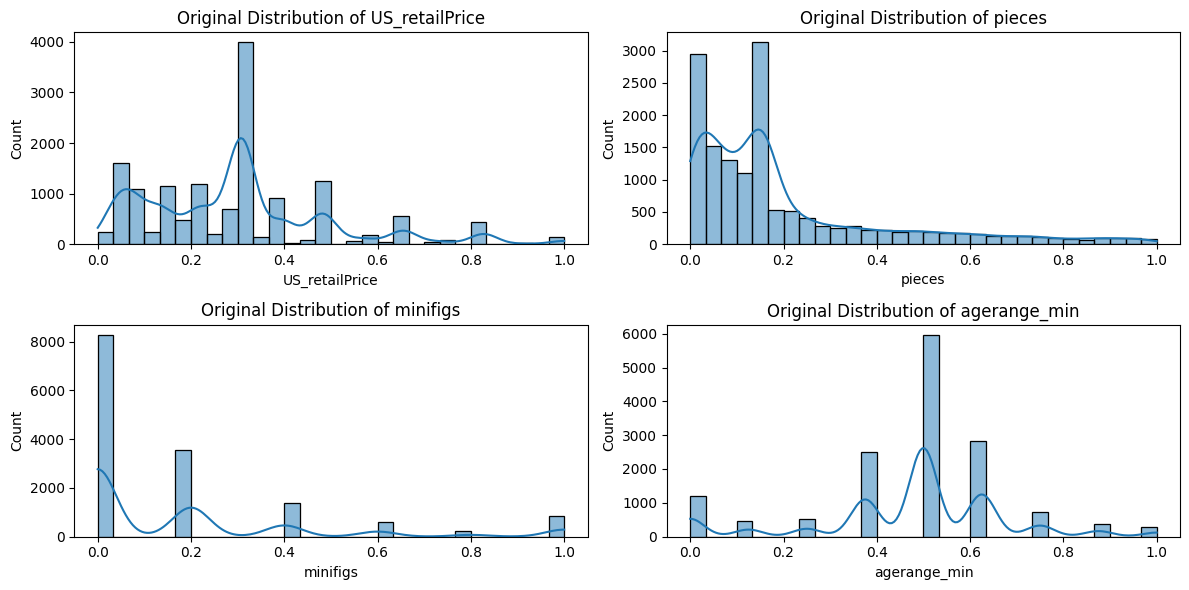

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(scaled[col], kde=True, bins=30)
    plt.title(f"Original Distribution of {col}")

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

scaled['US_retailPrice'] = np.log1p(scaled['US_retailPrice'])
scaled['pieces'] = np.log1p(scaled['pieces'])
scaled['minifigs'] = np.log1p(scaled['minifigs'])
scaled['agerange_min'] = np.log1p(scaled['agerange_min'])


<ipython-input-39-1b490fb37c5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled['US_retailPrice'] = np.log1p(scaled['US_retailPrice'])
<ipython-input-39-1b490fb37c5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled['pieces'] = np.log1p(scaled['pieces'])
<ipython-input-39-1b490fb37c5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

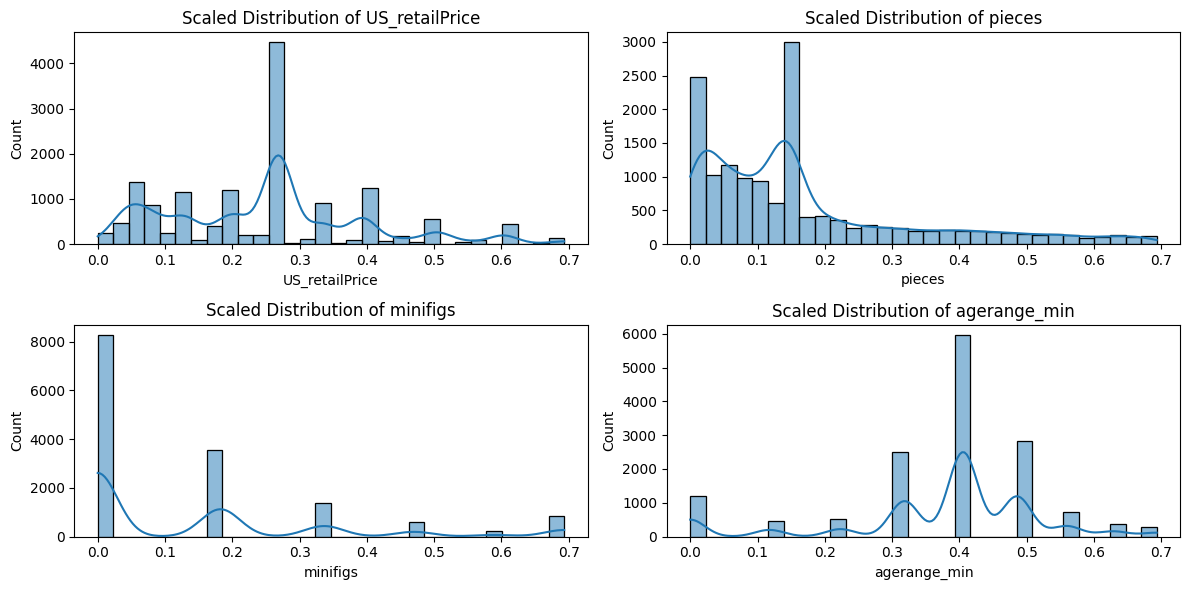

In [ ]:
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_cols):
    plt.subplot(2, 2, i+1)
    sns.histplot(scaled[col], kde=True, bins=30)
    plt.title(f"Scaled Distribution of {col}")

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Identify categorical columns
categorical_cols = ['theme', 'subtheme', 'themeGroup', 'category']

# Check unique values before encoding
for col in categorical_cols:
    print(f"{col}: {scaled[col].nunique()} unique values")


theme: 142 unique values
subtheme: 833 unique values
themeGroup: 16 unique values
category: 7 unique values


In [ ]:
print(scaled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14879 entries, 0 to 18456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            14879 non-null  int64  
 1   theme           14879 non-null  object 
 2   subtheme        14879 non-null  object 
 3   themeGroup      14877 non-null  object 
 4   category        14879 non-null  object 
 5   pieces          14879 non-null  float64
 6   minifigs        14879 non-null  float64
 7   agerange_min    14879 non-null  float64
 8   US_retailPrice  14879 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB
None


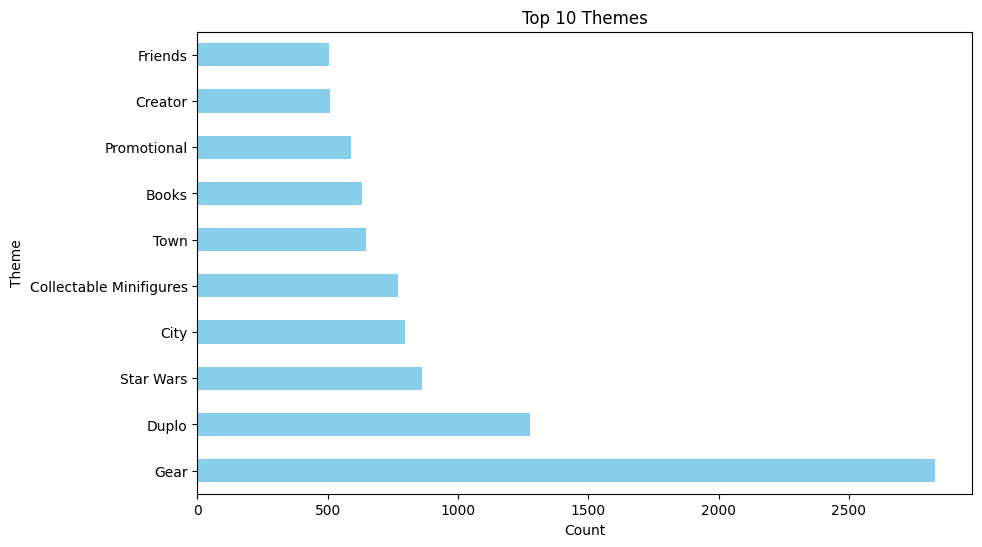

In [ ]:
top_n = 10  # You can change this to any N you want to focus on

# Get top N themes
top_themes = df['theme'].value_counts().head(top_n)

# Bar plot for top N themes
plt.figure(figsize=(10, 6))
top_themes.plot(kind='barh', color='skyblue')
plt.title(f"Top {top_n} Themes")
plt.xlabel("Count")
plt.ylabel("Theme")
plt.show()


In [ ]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14879 entries, 0 to 18456
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            14879 non-null  int64  
 1   theme           14879 non-null  object 
 2   subtheme        14879 non-null  object 
 3   themeGroup      14877 non-null  object 
 4   category        14879 non-null  object 
 5   pieces          14879 non-null  float64
 6   minifigs        14879 non-null  float64
 7   agerange_min    14879 non-null  float64
 8   US_retailPrice  14879 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
import pandas as pd

# Identify categorical columns
categorical_cols = ['theme', 'subtheme', 'themeGroup', 'category']

# Check unique values before encoding
for col in categorical_cols:
    print(f"{col}: {scaled[col].nunique()} unique values")


theme: 142 unique values
subtheme: 833 unique values
themeGroup: 16 unique values
category: 7 unique values


In [ ]:
scaled = pd.get_dummies(scaled, columns=categorical_cols, drop_first=True)  # Drop first category to prevent multicollinearity

In [ ]:
print(scaled.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14879 entries, 0 to 18456
Columns: 999 entries, year to category_Random
dtypes: bool(994), float64(4), int64(1)
memory usage: 14.8 MB
None


In [ ]:
num_features = ['pieces', 'minifigs', 'US_retailPrice', 'agerange_min', 'year']
scaled.dropna(inplace=True)
scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14879 entries, 0 to 18456
Columns: 999 entries, year to category_Random
dtypes: bool(994), float64(4), int64(1)
memory usage: 14.8 MB


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA

# --- Step 1: Select numeric features ---
num_features = ['pieces', 'minifigs', 'US_retailPrice', 'agerange_min', 'year']
num_features = [col for col in num_features if col in df.columns]
numeric_df = df[num_features].astype(float)

# --- Step 2: Scale numeric features ---
scaler = StandardScaler()
scaled_numeric = pd.DataFrame(scaler.fit_transform(numeric_df), columns=num_features)

# --- Step 3: Polynomial interaction terms (only interactions, no squares) ---
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_transformed = poly.fit_transform(scaled_numeric)
poly_feature_names = poly.get_feature_names_out(num_features)
poly_df = pd.DataFrame(poly_transformed, columns=poly_feature_names)

# --- Step 4: One-hot encode the 'theme' column ---
df = pd.get_dummies(df, columns=['theme'], prefix='theme')
theme_cols = [col for col in df.columns if col.startswith('theme_')]
theme_df = df[theme_cols].astype(int).reset_index(drop=True)

# --- Step 5: Combine polynomial + theme ---
combined_df = pd.concat([poly_df.reset_index(drop=True), theme_df], axis=1)


In [ ]:
combined_df.to_csv('./scaled.csv')

In [ ]:
  # Replace '/files/scaled.csv' if stored elsewhere
scaled = pd.read_csv('./scaled.csv')

In [ ]:
scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18457 entries, 0 to 18456
Columns: 170 entries, Unnamed: 0 to theme_Znap
dtypes: float64(15), int64(155)
memory usage: 23.9 MB


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [ ]:
# Define features and target
y = scaled['US_retailPrice']
leak_cols = [col for col in scaled.columns if 'US_retailPrice' in col]
X = scaled.drop(columns=leak_cols)
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("Training MSE:", mean_squared_error(y_train, train_preds))
print("Test MSE:", mean_squared_error(y_test, test_preds))
print("Training R²:", r2_score(y_train, train_preds))
print("Test R²:", r2_score(y_test, test_preds))


Training MSE: 0.29795837741171816
Test MSE: 0.30742678736728285
Training R²: 0.7050713289026647
Test R²: 0.6793961379755731


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate with best parameters
rf_model = RandomForestRegressor(
    max_depth=15,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,  # default value; increase if needed
    random_state=42,
    n_jobs=-1
)

# Fit and evaluate
rf_model.fit(X_train, y_train)

train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print("Training MSE:", mean_squared_error(y_train, train_preds))
print("Test MSE:", mean_squared_error(y_test, test_preds))
print("Training R²:", r2_score(y_train, train_preds))
print("Test R²:", r2_score(y_test, test_preds))


Training MSE: 0.12233232366883463
Test MSE: 0.1892420165397801
Training R²: 0.8789115783039583
Test R²: 0.8026466012297768


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model
gbr.fit(X_train, y_train)

# Predict on the test set
y_train_gbr = gbr.predict(X_train)
y_test_gbr = gbr.predict(X_test)

print("GradientBoosting Regression:")
print(f"Training MSE: {mean_squared_error(y_train,y_train_gbr )}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_gbr)}")
print(f"Training R²: {r2_score(y_train, y_train_gbr)}")
print(f"Test R²: {r2_score(y_test,y_test_gbr )}")

GradientBoosting Regression:
Training MSE: 0.1756636154988226
Test MSE: 0.20838276897369912
Training R²: 0.8261225707789631
Test R²: 0.7826854286692462


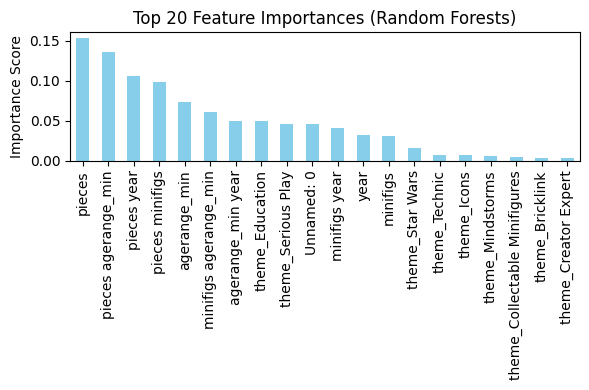

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = rf_model.feature_importances_
features = X.columns

# Create a Series and select top 2 features
top_features = pd.Series(feature_importances, index=features).sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(6, 4))
top_features.plot(kind='bar', color='skyblue')
plt.title("Top 20 Feature Importances (Random Forests)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate XGBoost Regressor
xgb_reg = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train the model
xgb_reg.fit(X_train, y_train)

# Predictions
y_train_pred = xgb_reg.predict(X_train)
y_test_pred = xgb_reg.predict(X_test)

# Evaluation
print("XGBoost Regression:")
print(f"Training MSE: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred)}")
print(f"Training R²: {r2_score(y_train, y_train_pred)}")
print(f"Test R²: {r2_score(y_test, y_test_pred)}")


XGBoost Regression:
Training MSE: 0.10905625807729558
Test MSE: 0.16943804865619091
Training R²: 0.8920526499406293
Test R²: 0.8232994162992099


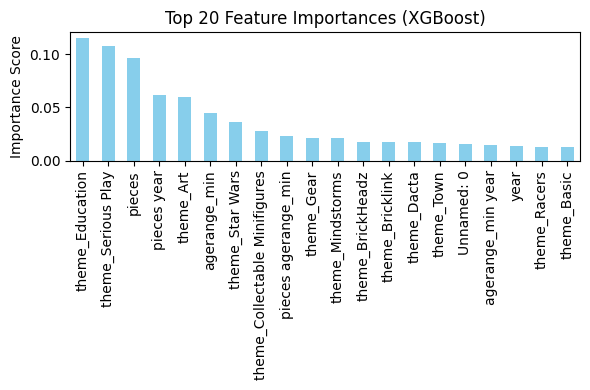

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

feature_importances = xgb_reg.feature_importances_
features = X.columns

# Create a Series and select top 2 features
top_features = pd.Series(feature_importances, index=features).sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(6, 4))
top_features.plot(kind='bar', color='skyblue')
plt.title("Top 20 Feature Importances (XGBoost)")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


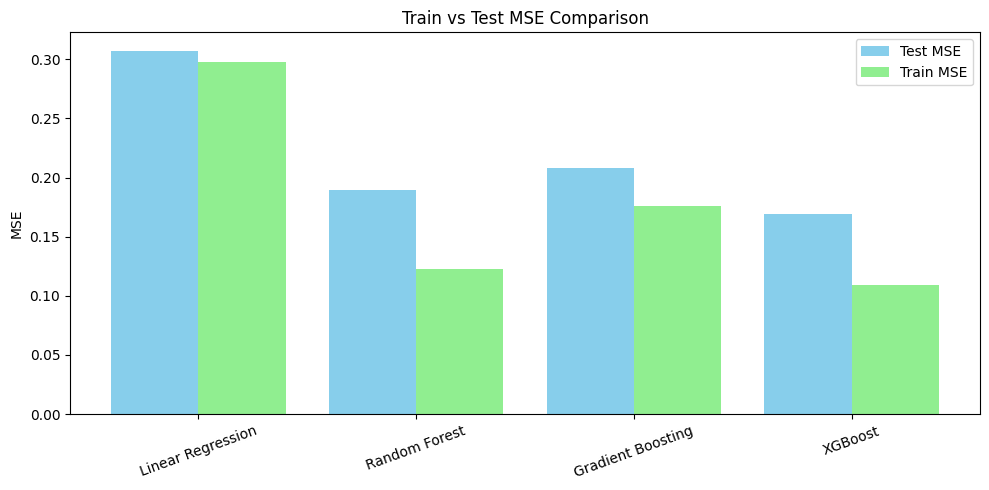

In [ ]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'XGBoost']
train_mse = [0.29796, 0.12233, 0.17566, 0.10906]
test_mse = [0.30743, 0.18924, 0.20838, 0.16944]

x = range(len(models))
plt.figure(figsize=(10, 5))
plt.bar(x, test_mse, width=0.4, label='Test MSE', align='center', color='skyblue')
plt.bar([i + 0.4 for i in x], train_mse, width=0.4, label='Train MSE', align='center', color='lightgreen')
plt.xticks([i + 0.2 for i in x], models, rotation=20)
plt.ylabel("MSE")
plt.title("Train vs Test MSE Comparison")
plt.legend()
plt.tight_layout()
plt.show()


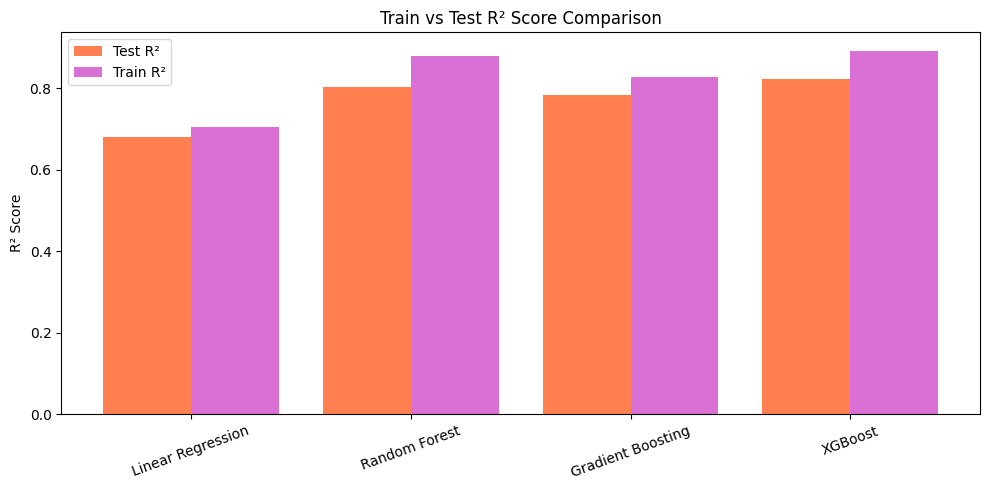

In [ ]:
train_r2 = [0.70507, 0.87891, 0.82612, 0.89205]
test_r2 = [0.67940, 0.80265, 0.78269, 0.82330]

x = range(len(models))
plt.figure(figsize=(10, 5))
plt.bar(x, test_r2, width=0.4, label='Test R²', align='center', color='coral')
plt.bar([i + 0.4 for i in x], train_r2, width=0.4, label='Train R²', align='center', color='orchid')
plt.xticks([i + 0.2 for i in x], models, rotation=20)
plt.ylabel("R² Score")
plt.title("Train vs Test R² Score Comparison")
plt.legend()
plt.tight_layout()
plt.show()
